In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
scores = pd.read_excel('../data/results/master_results.xlsx',sheet_name=None)

In [9]:
scores['consolidated']

,ts,model_tag,model_dir,metric,score
0,2024-01-02 13:00:36,bert-base-uncased,NaN,crows-pairs,60.480000
1,2024-01-02 13:01:25,bert-base-uncased,NaN,stereoset,68.162956
2,2024-01-02 13:05:13,bert-base-uncased,NaN,crows-pairs,60.480000
3,2024-01-02 13:06:02,bert-base-uncased,NaN,stereoset,68.162956
4,2024-01-02 13:09:55,bert-base-uncased,NaN,crows-pairs,60.480000
...,...,...,...,...,...
115,2024-01-03 08:31:23,distilbert-base-uncased_random_init,random init,ceat,0.120920
116,2024-01-05 09:27:02,bert-base-uncased,NaN,ceat,0.447698
117,2024-01-05 12:05:16,roberta-base,NaN,ceat,0.000000
118,2024-01-05 12:45:16,albert-base-v2,NaN,crows-pairs,56.760000


In [11]:
cons = scores['consolidated']
cons.head()

,ts,model_tag,model_dir,metric,score
0,2024-01-02 13:00:36,bert-base-uncased,NaN,crows-pairs,60.480000
1,2024-01-02 13:01:25,bert-base-uncased,NaN,stereoset,68.162956
2,2024-01-02 13:05:13,bert-base-uncased,NaN,crows-pairs,60.480000
3,2024-01-02 13:06:02,bert-base-uncased,NaN,stereoset,68.162956
4,2024-01-02 13:09:55,bert-base-uncased,NaN,crows-pairs,60.480000


In [97]:
def separate_model_mode(x):
    # print(x)
    x = x.split('_')
    # print(x)
    if(len(x)==1):
        return 'base'
    else:
        if(x[-1]=='init'):
            return 'random'
        else:
            return x[-1]

In [98]:
df = pd.DataFrame(cons.loc[cons['metric']=='ceat'].groupby('model_tag')['score'].mean()).reset_index()
df['base_model_tag'] = df['model_tag'].apply(lambda x : x.split('_')[0])

for bmt in np.unique((df['base_model_tag'])):
    
    tmp = df.loc[df['base_model_tag']==bmt]
    # tmp.plot.barh(x='model_tag',y='score')

In [99]:
cp = scores['crows-pairs']
cp['base_model_tag'] = cp['model_name'].apply(lambda x : x.split('_')[0])
cp['model_mode'] = cp['model_name'].apply(lambda x : separate_model_mode(x))
cp.head()

,total_examples,metric_score,stereotype_score,anti-stereotype_score:,num_neutral,ts,model_name,model_dir,metric,base_model_tag,model_mode
0,1508,60.48,61.09,56.88,0,2024-01-02 13:00:36,bert-base-uncased,NaN,crows-pairs,bert-base-uncased,base
1,1508,60.48,61.09,56.88,0,2024-01-02 13:05:13,bert-base-uncased,NaN,crows-pairs,bert-base-uncased,base
2,1508,60.48,61.09,56.88,0,2024-01-02 13:09:55,bert-base-uncased,NaN,crows-pairs,bert-base-uncased,base
3,1508,60.48,61.09,56.88,0,2024-01-02 13:14:38,bert-base-uncased,NaN,crows-pairs,bert-base-uncased,base
4,1508,60.48,61.09,56.88,0,2024-01-02 13:19:20,bert-base-uncased,NaN,crows-pairs,bert-base-uncased,base


In [ ]:
# cp.boxplot(column='metric_score',by='base_model_tag', figsize = (10,8))

In [104]:
# cp.boxplot(column='metric_score',by='model_mode', figsize = (10,8))

In [105]:
stereo = scores['stereoset']
stereo['base_model_tag'] = stereo['model_name'].apply(lambda x : x.split('_')[0])
stereo['model_mode'] = stereo['model_name'].apply(lambda x : separate_model_mode(x))
stereo.head()

,category,Count,LM Score,SS Score,ICAT Score,ts,model_name,model_dir,metric,base_model_tag,model_mode
0,gender,765,85.968797,63.930163,62.017611,2024-01-02 13:01:25,bert-base-uncased,NaN,stereoset,bert-base-uncased,base
1,profession,2430,82.654933,61.442721,63.738987,2024-01-02 13:01:25,bert-base-uncased,NaN,stereoset,bert-base-uncased,base
2,race,2886,85.667857,57.445487,72.911079,2024-01-02 13:01:25,bert-base-uncased,NaN,stereoset,bert-base-uncased,base
3,religion,237,88.459770,56.459770,77.031175,2024-01-02 13:01:25,bert-base-uncased,NaN,stereoset,bert-base-uncased,base
4,overall,2106,84.667824,59.746836,68.162956,2024-01-02 13:01:25,bert-base-uncased,NaN,stereoset,bert-base-uncased,base


<Axes: xlabel='category', ylabel='SS Score'>

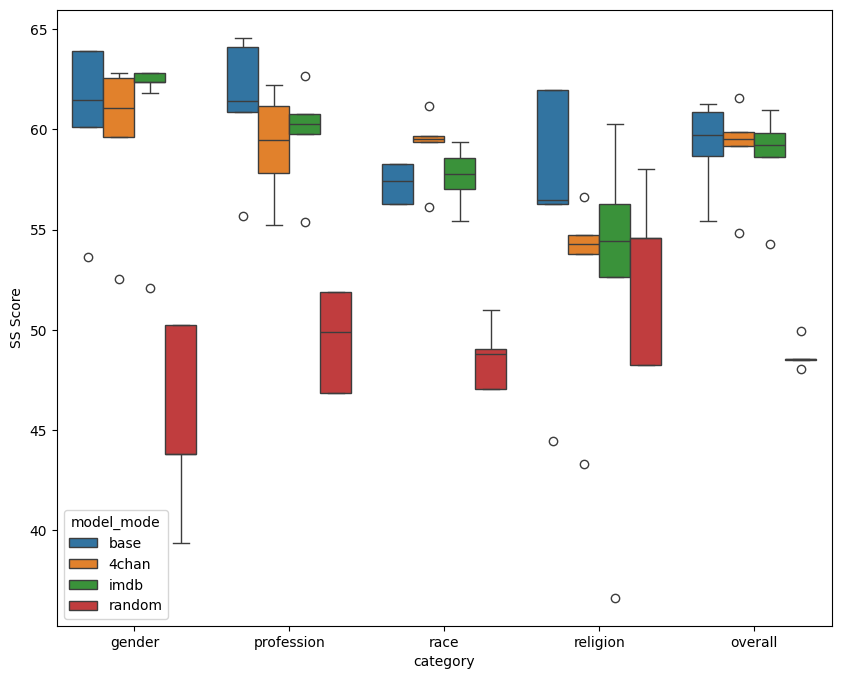

In [132]:
# stereo.boxplot(column='ICAT Score',by='model_mode',hue='category', figsize = (10,8))
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x='category', y='SS Score', hue='model_mode', data=stereo, ax = ax)

In [139]:
ceat = scores['ceat']
ceat['base_model_tag'] = ceat['model_name'].apply(lambda x : x.split('_')[0])
ceat['model_mode'] = ceat['model_name'].apply(lambda x : separate_model_mode(x))
ceat.head()

,group,PES,p-value,ts,model_name,model_dir,metric,base_model_tag,model_mode
0,1,0.501079,0.000000e+00,2024-01-02 17:36:21,bert-base-uncased,NaN,ceat,bert-base-uncased,base
1,2,0.516826,0.000000e+00,2024-01-02 17:36:21,bert-base-uncased,NaN,ceat,bert-base-uncased,base
2,3,0.329456,8.382907e-289,2024-01-02 17:36:21,bert-base-uncased,NaN,ceat,bert-base-uncased,base
3,4,0.366961,1.097725e-219,2024-01-02 17:36:21,bert-base-uncased,NaN,ceat,bert-base-uncased,base
4,5,0.000570,4.811871e-01,2024-01-02 17:36:21,bert-base-uncased,NaN,ceat,bert-base-uncased,base


<Axes: title={'center': 'PES'}, xlabel='model_mode'>

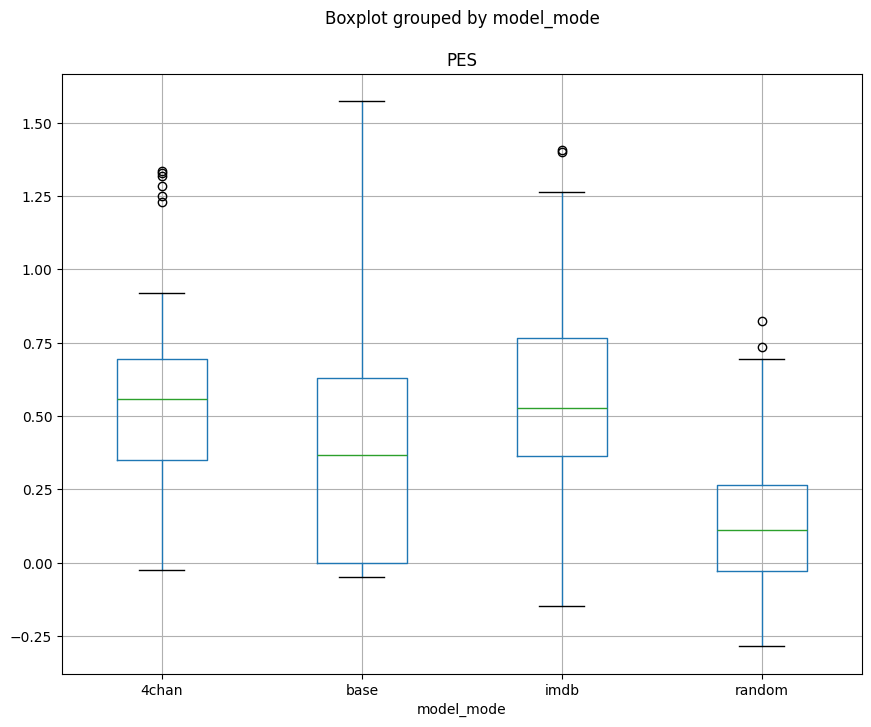

In [138]:
# fig, ax = plt.subplots(figsize=(10, 8))
# sns.boxplot(x='group', y='PES', hue='model_mode', data=ceat, ax = ax)
ceat.boxplot(column='PES',by='model_mode', figsize = (10,8))